Codigo .....

[[5.         2.5        1.875      1.5625     1.3828125  1.26953125]
 [2.5        1.875      1.5625     1.3828125  1.26953125 1.19384766]
 [1.875      1.5625     1.3828125  1.26953125 1.19384766 1.14135742]
 [1.5625     1.3828125  1.26953125 1.19384766 1.14135742 1.10403442]
 [1.3828125  1.26953125 1.19384766 1.14135742 1.10403442 1.07704163]
 [1.26953125 1.19384766 1.14135742 1.10403442 1.07704163 1.05729103]] 

 [[8.768     ]
 [5.4514    ]
 [4.4015375 ]
 [3.83755938]
 [3.49619141]
 [3.2734498 ]]

 [[ 1.        ]
 [ 1.14302042]
 [-0.69315909]
 [ 3.50929878]
 [-3.78098908]
 [ 1.54012896]]

E = 1.5617473771112981e-27


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


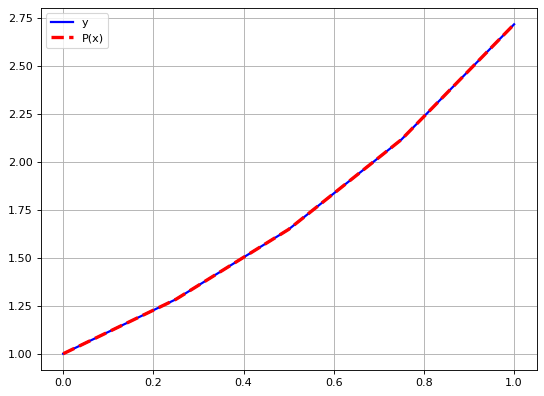

In [ ]:
# Copyright 2017 Abien Fred Agarap. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

import numpy as np
import pylab as pl
from scipy import linalg

def main():
	n = 5	# this is the degree of the approximating polynomial P(x)
	x = np.array([0, 0.25, 0.5, 0.75, 1.0], float)	# x-values
	y = np.array([1, 1.284, 1.6487, 2.117, 2.7183], float)	# y-values (actual)
	xs, xy = get_system_of_equations(x, y, n)	# \sum_{k=0}^{n}a_{k} \sum_{i=1}^{m}x_{i}^{j+k} = \sum_{i=1}^{m}y_{i}x_{i}^{j}, for j = 0,1,...,n
	xs = np.reshape(xs, ((n + 1), (n + 1)))	# reshape the matrix xs to solve the system of equations
	xy = np.reshape(xy, ((n + 1), 1))
	print(xs, '\n\n', xy)
	a = np.linalg.solve(xs, xy)	# solve the system of equations
	print('\n', a)	# print the solution to the system of equations
	error = find_error(y, np.array(fn(x, a)))	# determine the error of P(x)
	print("\nE =",error)
	plot(x, y, fn(x, a))	# plot the data points and the approximating function P(x)
	
def get_system_of_equations(x, y, n):
	xs = np.array([]); xy = np.array([])	# xs is summation of x-values, xy is product of x- and y-values
	for index in range(0, (n + 1)):
		for exp in range(0, (n + 1)):
			tx = np.sum(x**(index + exp))	# \sum_{i=1}^{m}x_{i}^{j+k}
			xs = np.append(xs, tx)
		ty = np.sum(y * (x**index))	# \sum_{i=1}^{m}y_{i}x_{i}^{j}
		xy = np.append(xy, ty)
	return xs, xy

def find_error(y, fn):
	return np.sum((y - fn)**2)	# E = \sum_{i=1}^{m} (y_{i} - P(x_{i}))**2

def fn(x, a):
	px = 0
	for index in range(0, np.size(a)):
		px += (a[index] * (x**index))	# evaluate the P(x)
	return px

def plot(x, y, fn):
	pl.figure(figsize=(8, 6), dpi=80)
	pl.subplot(1, 1, 1)
	pl.plot(x, y, color='blue', linewidth=2.0, linestyle='-', label='y')
	pl.subplot(1, 1, 1)
	pl.plot(x, fn, color='red', linewidth=3.0, linestyle='--', label='P(x)')
	pl.legend(loc='upper left')
	pl.grid()
	pl.show()

if __name__ == '__main__':
	main()

Codigo 2

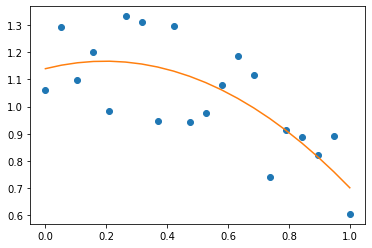

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)

x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.4*np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 2))

t = np.linspace(0, 1, 20)
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()

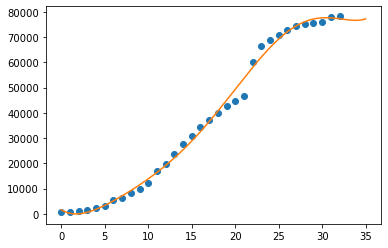

In [20]:
# 33 days of covid
y = [555,654,941,1434,2118,2927,5578,6166,8234,9927,12038,16787,19887,23898,27643,30802,34334,37068,40095,42633,44675,46561,60206,66690,68765,70879,72815,74609,75030,75577,76206,77967,78290]
x = list(range(0,33))

p = np.poly1d(np.polyfit(x, y, 6))
# the bigger the grade, the least prediction outside the domain
# the further you go from the domain (training area), the more divergence will be between data and polynomial
# so this is useful for 3-5 days of prediction, after that the polynomial would be far away
days = 2
t = np.linspace(0, len(x)+days, 200)
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()